In [64]:
# Importando Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd #para geolocalización
from scipy import stats
from pandas_profiling import ProfileReport # infoHTML

In [65]:
# Leemos los datos seleccionados
df_main = pd.read_csv('../data/merged_data_cleaned.csv',index_col=0)

In [66]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1339 non-null   object 
 1   Owner                  1332 non-null   object 
 2   Country.of.Origin      1338 non-null   object 
 3   Farm.Name              980 non-null    object 
 4   Lot.Number             276 non-null    object 
 5   Mill                   1021 non-null   object 
 6   ICO.Number             1182 non-null   object 
 7   Company                1130 non-null   object 
 8   Altitude               1113 non-null   object 
 9   Region                 1280 non-null   object 
 10  Producer               1107 non-null   object 
 11  Number.of.Bags         1339 non-null   int64  
 12  Bag.Weight             1339 non-null   object 
 13  In.Country.Partner     1339 non-null   object 
 14  Harvest.Year           1292 non-null   object 
 15  Grad

In [67]:
df_main.head(10)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
6,Arabica,hugo valdivia,Peru,NaN,NaN,hvc,NaN,richmond investment-coffee department,NaN,NaN,...,Bluish-Green,0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
7,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,oromia,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
8,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,oromiya,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
9,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,NaN,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,"snnp/kaffa zone,gimbowereda",...,Green,4,"March 29th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1795.0,1850.0,1822.5


In [68]:
df_main.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

Generación de reporte HTML

In [69]:
profile = ProfileReport(df_main, title='Pandas Profiling Report', explorative=True)

In [15]:
# profile.to_file('../data/reports/merged_data_cleaned.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


In [70]:
%matplotlib inline

Renombrar columnas a usar

In [71]:
df_main.rename(columns={'Country.of.Origin': 'Country_of_Origin',
       'ICO.Number':'ICO_number', 'Number.of.Bags': 'Number_of_Bags', 'Bag.Weight': 'Bag_Weight', 
       'Harvest.Year':'Harvest_Year', 'Grading.Date': 'Grading_Date', 'Owner.1':'Owner_1', 
       'Processing.Method': 'Processing_Method', 'Clean.Cup':'Clean_Cup','Cupper.Points':'Cupper_Points', 
       'Total.Cup.Points': 'Total_Cup_Points', 'Category.One.Defects':'Category_One_Defects',
       'Category.Two.Defects':'Category_Two_Defects', 'Certification.Body': 'Certification_Body',
       'Certification.Address':'Certification_Address', 'Certification.Contact': 'Certification_Contact'},inplace=True)

df_main.columns

Index(['Species', 'Owner', 'Country_of_Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO_number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number_of_Bags', 'Bag_Weight', 'In.Country.Partner', 'Harvest_Year',
       'Grading_Date', 'Owner_1', 'Variety', 'Processing_Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean_Cup', 'Sweetness', 'Cupper_Points', 'Total_Cup_Points',
       'Moisture', 'Category_One_Defects', 'Quakers', 'Color',
       'Category_Two_Defects', 'Expiration', 'Certification_Body',
       'Certification_Address', 'Certification_Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

Seleccion de variables a usar

In [72]:
columns_use = ['Species', 'Country_of_Origin',
       'Mill', 'ICO_number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number_of_Bags', 'Bag_Weight', 'Harvest_Year',
       'Grading_Date', 'Owner_1', 'Variety', 'Processing_Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean_Cup', 'Sweetness', 'Cupper_Points', 'Total_Cup_Points',
       'Moisture', 'Category_One_Defects', 'Quakers', 'Color',
       'Category_Two_Defects', 'Expiration', 'Certification_Body',
       'Certification_Address', 'Certification_Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']

In [41]:
# df_main[columns_use]

## Preguntas de Exploración
### Rendimiento del café
1. 

### Calidad del café
1. Cuantos tipos de Variedades de Café por Especie(Nuestra data tiene de Arábica y Robusta)?
2. Cuanto es la humedad por Especie y Variedad?
3. Altitud por país o región?
4. Altitud minima y máxima por país o región?
5. Método de procesamiento por Variedad y Especie?
6. Variedad y Especie por país?
7. Defectos de categoría uno y dos por especie?



In [129]:
def diagnostic_categorico_plot(df, variable):
    # Define el tamaño de la grafica
    plt.figure(figsize = (22,4))
    
    # Histograma
    plt.subplot(1,2,1)
    sns.histplot(df[variable].value_counts(), bins = 30)
    plt.title('Histograma')
    
    # Grafica de Caja
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable].value_counts())
    plt.title('Grafico de Cajas')

    df[variable].info()


<class 'pandas.core.series.Series'>
Int64Index: 1339 entries, 0 to 1338
Series name: Variety
Non-Null Count  Dtype 
--------------  ----- 
1113 non-null   object
dtypes: object(1)
memory usage: 20.9+ KB


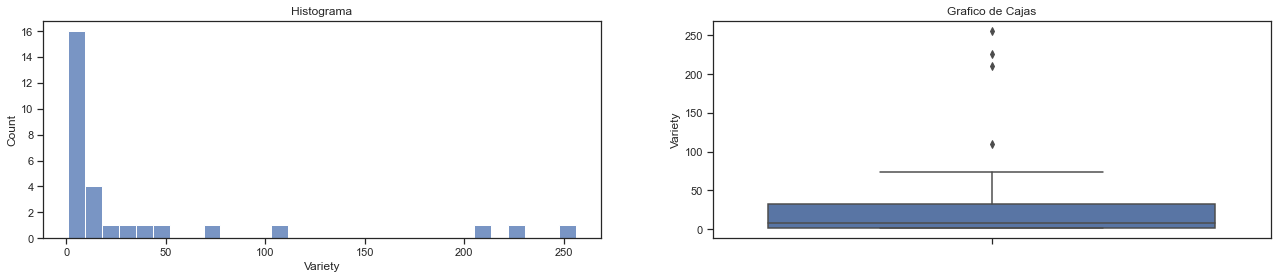

In [130]:
diagnostic_categorico_plot(df_main,'Variety')

In [102]:
# 1. Cuantos tipos de Variedades de Café por Especie hay(Nuestra data tiene de Arábica y Robusta)?
# eliminando vaciós
conteo_variedad_x_especie = (df_main[['Variety', 'Species']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['Variety', 'Species']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_variedad_x_especie.head()


,Variety,Species,conteo
0,Arusha,Arabica,5
1,Arusha,Robusta,1
2,Blue Mountain,Arabica,2
3,Bourbon,Arabica,226
4,Catimor,Arabica,20


<Figure size 1440x2160 with 0 Axes>

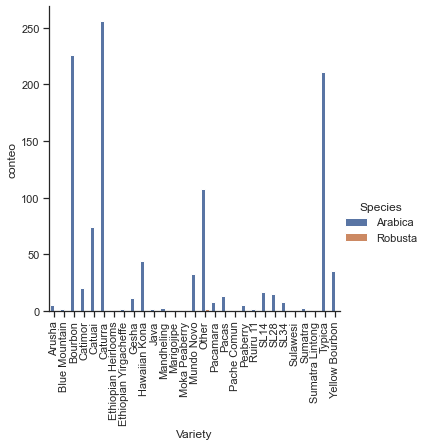

In [131]:
plt.figure(figsize=(20,30))
graf_variedad_especie = sns.catplot(
    data=conteo_variedad_x_especie, kind="bar",
    x="Variety", y="conteo", hue="Species",
)

graf_variedad_especie.set_xticklabels(rotation=90)

plt.show()
